Exploring Central Limit

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import calendar
from matplotlib.pyplot import subplots, show
from scipy.stats import ttest_ind
%matplotlib inline

Instructions: Reproduce the pop1 and pop2 populations and samples, using numpy's binomial function. Specifically, create two binomially distributed populations with n equal to 10 and size equal to 10000. The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. Using a sample size of 100, calculate the means and standard deviations of your samples.

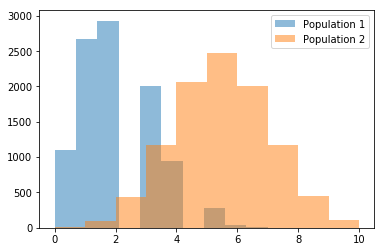

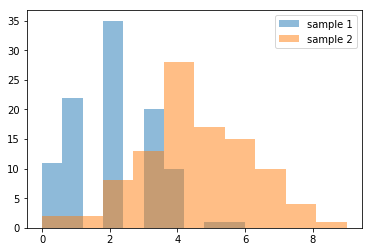

In [21]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

# Let’s make histograms for the two groups. 

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

S1 Mean: 2.03
S1 Stand Dev: 1.2284543133547945
S2 Mean: 4.55
S2 Stand Dev: 1.7909494688572314
Mean Diff: 2.52
Standard error: 0.21717734688498241
T-value: 11.603420136330321
Ttest_indResult(statistic=11.54525726311865, pvalue=2.704863161713831e-23)


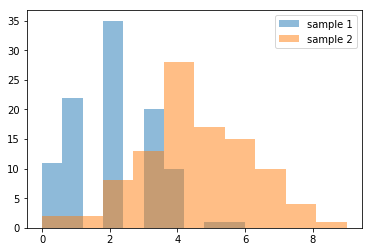

In [28]:
def calc_samples(sample1,sample2):
    print("S1 Mean: {}".format(sample1.mean()))
    print("S1 Stand Dev: {}".format(sample1.std()))
    print("S2 Mean: {}".format(sample2.mean()))
    print("S2 Stand Dev: {}".format(sample2.std()))

    diff=sample2.mean( ) -sample1.mean()
    print("Mean Diff: {}".format(diff))

    n = np.array([len(sample1), len(sample2)])
    sd = np.array([sample1.std(), sample2.std()])

    # The squared standard deviations are divided by the sample size and summed, then we take
    # the square root of the sum. 
    diff_se = (sum(sd ** 2 / n)) ** 0.5

    #The difference between the means divided by the standard error: T-value.  
    print("Standard error: {}".format(diff_se))
    print("T-value: {}".format(diff/diff_se))
    
    print(ttest_ind(sample2, sample1, equal_var=False))
    
    plt.hist(sample1, alpha=0.5, label='sample 1') 
    plt.hist(sample2, alpha=0.5, label='sample 2') 
    plt.legend(loc='upper right') 
    plt.show()
    
calc_samples(sample1,sample2)

--------

1.Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?


_Guess: A bigger sample size will decrease the T-Value and and Standard error. Diff between the means will decrease.

S1 Mean: 1.987
S1 Stand Dev: 1.2699728343551289
S2 Mean: 5.049
S2 Stand Dev: 1.5532543256015738
Mean Diff: 3.0620000000000003
Standard error: 0.06344627648648894
T-value: 48.26130341395309
Ttest_indResult(statistic=48.237166726564965, pvalue=0.0)


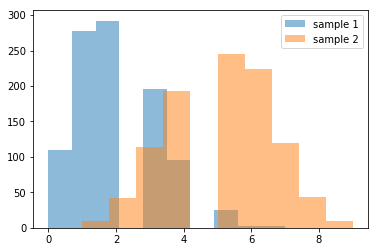

S1 Mean: 2.2
S1 Stand Dev: 1.16619037896906
S2 Mean: 4.95
S2 Stand Dev: 1.2835497652993437
Mean Diff: 2.75
Standard error: 0.38778215533982474
T-value: 7.0916104883425986
Ttest_indResult(statistic=6.9120469003365566, pvalue=3.390846732648055e-08)


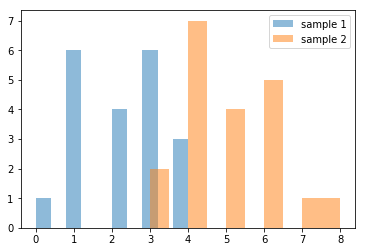

In [33]:
sample1 = np.random.choice(pop1, 1000, replace=True)
sample2 = np.random.choice(pop2, 1000, replace=True)

calc_samples(sample1,sample2)

sample1 = np.random.choice(pop1, 20, replace=True)
sample2 = np.random.choice(pop2, 20, replace=True)

calc_samples(sample1,sample2)

_Result: Bigger sample size resulted bigger T-Value and a lower SE with a pvalue of 0 (why is this?). Smaller sample size resulted in smaller T-Value and bigger SE.

----

2.Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?


_Guess: For 0.3: I think the T-statistic will decrease because the variance will increase and the p-value with be higher.  For 0.4: I think the T-statistic will increase because the variance will be closer and the p-value will be lower.

S1 Mean: 2.88
S1 Stand Dev: 1.4232357499725756
S2 Mean: 5.05
S2 Stand Dev: 1.3955285736952863
Mean Diff: 2.17
Standard error: 0.19932636554154096
T-value: 10.886668174099414
Ttest_indResult(statistic=10.832098065177382, pvalue=9.061891349717461e-22)


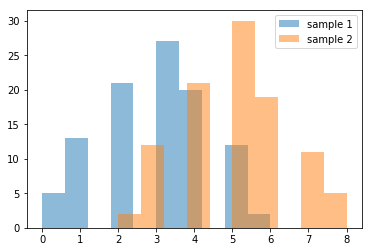

S1 Mean: 4.26
S1 Stand Dev: 1.5337535656030272
S2 Mean: 5.0
S2 Stand Dev: 1.5427248620541512
Mean Diff: 0.7400000000000002
Standard error: 0.2175408007707979
T-value: 3.4016607338853553
Ttest_indResult(statistic=3.384609695514813, pvalue=0.0008593395958932745)


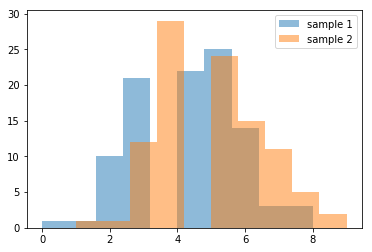

In [38]:
pop1 = np.random.binomial(10, 0.3, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

calc_samples(sample1,sample2)

pop1 = np.random.binomial(10, 0.4, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

calc_samples(sample1,sample2)

_Result: The opposite of my predictions. t-statistic and pvalue has an inverse correlation to the probability value in the pop. As probability value increased t-stat and pvalue decreased.

-----

3.Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

_Guess: Gamma is left skewed. I think the t-statistic and pvalues will be larger

S1 Mean: 18.83836128611109
S1 Stand Dev: 8.120814140127363
S2 Mean: 5.18
S2 Stand Dev: 1.596120296218302
Mean Diff: -13.658361286111091
Standard error: 0.827618404208682
T-value: -16.503211161876443
Ttest_indResult(statistic=-16.420487777984807, pvalue=5.7673549879425755e-31)


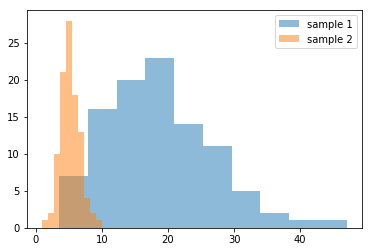

In [51]:
pop1 = np.random.gamma(5, 5, 10000)
pop1 = np.random.gamma(5, 4, 10000)

sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

calc_samples(sample1,sample2)

_Result: T-statistic is consistently negative?